### Fake News Project

By: Mateo Anusic, Emil Thorlund, Lucas A. Rosing, Victor Bergien

### Task #1

- Structure, process and clean the text.
- Tokenize the text
- Remove stopwords and compute the size of the vocabulary.
- Compute the reduction rate of the vocabulary size after removing stopwords.
- Remove word variations with stemming and compute the size of the vocabulary.
- Compute the reduction rate of the vocabulary size after stemming.

Describe which procedures (and which libraries) you used and why they are appropriate.

In [35]:
# Import the necessary libraries
# Note that some may be missing, you can install them using pip

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from cleantext import clean 
import cleantext
import csv
import requests
from io import StringIO
from itertools import islice

# Download the dataset from the following link
data_url = 'https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv'

# Download the nltk data for the first time
#nltk.download('punkt')

# Read the dataset
response = requests.get(data_url)
response.raise_for_status()  #Raise exeption

# Convert the dataset into a csv file
csv_data = response.content.decode('utf-8')
csv_file = StringIO(csv_data)

# Read the csv file
reader = csv.DictReader(csv_file)

# Create a subset of the dataset for testing
start_row = 100
end_row = 102

subset_rows = list(islice(reader, start_row, end_row))

In [36]:
# Regular expressions for identifying dates, numbers, emails and urls
date_pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.\d{6})|'              # YYYY-MM-DD HH:MM:SS.MMMMMM
                        r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})|'                      # YYYY-MM-DD HH:MM:SS
                        r'(\d{4}-\d{2}-\d{2})|'                                        # YYYY-MM-DD
                        r'(\d{4}\.\d{2}\.\d{2})|'                                      # YYYY.MM.DD 
                        r'(\d{2}\.\d{2}\.\d{4})|'                                      # DD.MM.YYYY
                        r'(\d{4}/\d{2}/\d{2})|'                                        # YYYY/MM/DD
                        r'(\d{2}/\d{2}/\d{4})|'                                        # DD/MM/YYYY
                        r'((january|february|march|april|june|july|august|september|'  # <Month> DD YYYY
                        r'october|november|december) \d{2}, \d{4})', re.IGNORECASE)  
number_pattern = re.compile(r'(\d+(?:,\d{3})*(?:\.\d+)?)')
url_pattern = re.compile(r'https?://\S+|www\.\S+|\S+\.com')

# A function to clean the text and tokenize it
# Using regular expressions to identify dates, numbers, emails and urls
# And replacing them with <DATE>, <NUM>, <EMAIL> and <URL> respectively
# Then tokenizing the text using nltk.word_tokenize
def clean_text_and_tokenize(read):
    if not isinstance(read, str):
        return []
    read = read.lower() # Convert the text to lowercase
    read = re.sub(r"\s+", " ", read) # Remove extra spaces
    read = re.sub(date_pattern, '<DATE>', read) # Replace dates with <DATE>
    read = re.sub(number_pattern, "<NUM>", read) # Replace numbers with <NUM>
    read = re.sub(r"\S+@\S+", "<EMAIL>", read) # Replace emails with <EMAIL>
    read = re.sub(url_pattern, "<URL>", read) # Replace urls with <URL>
    tokens = word_tokenize(read)  # Tokenize the text
    return tokens

# A function to remove stopwords using nltk.corpus.stopwords
def remove_stopwords(tokens):
    # Create a set of stopwords from nltk.corpus.stopwords
    stop_words = set(stopwords.words('english'))
    # Remove the stopwords from the tokens and return the filtered tokens
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# A function to stem the tokens using nltk.stem.PorterStemmer
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    # Stem the tokens and return the stemmed tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [37]:
# Print the cleaned text and tokens for testing
for row_number, row in enumerate(subset_rows, start=start_row):
    print(f"Row {row_number}:") # Print the row number
    for column_name, cell_value in row.items():
        # For each column, print the column name and the cleaned text and tokens
        tokens = clean_text_and_tokenize(cell_value)  # Clean text and tokenize
        no_stopwords_tokens = remove_stopwords(tokens)
        stemmed_tokens = stem_tokens(no_stopwords_tokens)
        cleaned_cell_value = ' '.join(stemmed_tokens)
        print(f"  {column_name}: {cleaned_cell_value}")
    print()

Row 100:
  : < num >
  id: < num >
  domain: < url >
  type: fake
  url: < url >
  content: greenmedinfo – action item link % reader think stori fact . add two cent . headlin : bitcoin & blockchain search exceed trump ! blockchain stock next ! one link greedmedinfo updat incomplet . letter write campaign locat : make fda advisori , mandatori sourc : < url >
  scraped_at: < date >
  inserted_at: < date >
  updated_at: < date >
  title: greenmedinfo – action item link
  authors: downsiz dc
  keywords: 
  meta_keywords: [ `` ]
  meta_description: 
  tags: 
  summary: 

Row 101:
  : < num >
  id: < num >
  domain: < url >
  type: fake
  url: < url >
  content: < num > annoy twitter auto dm headlin : bitcoin & blockchain search exceed trump ! blockchain stock next ! seen “ cheap supplement < num > ” “ regist busi program ’ receiv endless benefits. ” like thought email spam . ’ real exampl spam , twitter . last week wrote < num > worst social media mistak . one mistak annoy auto direct messa

In [38]:
# Testing the functions on a sample text
test_line = "This is an example sentence."
print(clean_text_and_tokenize(test_line))
print(remove_stopwords(clean_text_and_tokenize(test_line)))
print(stem_tokens(remove_stopwords(clean_text_and_tokenize(test_line))))

['this', 'is', 'an', 'example', 'sentence', '.']
['example', 'sentence', '.']
['exampl', 'sentenc', '.']


### Unique words in the data before and after preprocessing ###

Unique words before preprocessing:            19293

Unique words after removing stopwords:        17737

Reduction rate in % after removing stopwords: 8.07%

Unique words after stemming:                  12632

Reduction rate in % after stemming:           34.03%


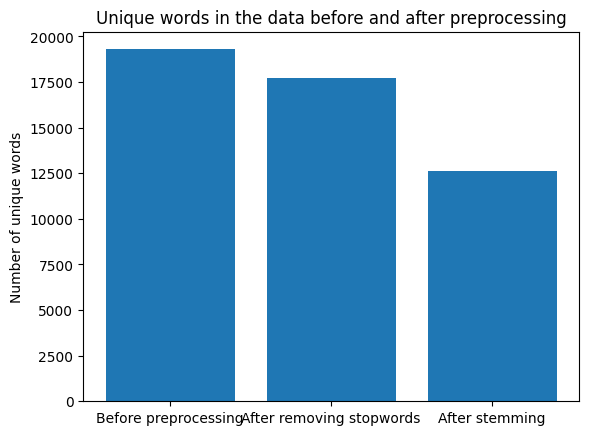

In [39]:
# A function to count the number of unique words in a list of documents
def count_unique_words(documents):
    # Create a set of unique words from the list of documents
    word_set = set()
    for document in documents:
        # Clean the text and tokenize it
        tokens = clean_text_and_tokenize(document)  
        word_set.update(tokens)
    # Return the number of unique words
    return len(word_set)

# Count unique words before removing stopwords and stemming
unique_words = set(word_tokenize(csv_data.lower()))

# Count unique words after removing stopwords
no_stopwords_unique_words = remove_stopwords(unique_words)
unique_words_after_stopwords = count_unique_words(no_stopwords_unique_words)

# Compute reduction rate in % after removing stopwords
reduction_rate= ((len(unique_words) - unique_words_after_stopwords) / len(unique_words)) * 100

# Count unique words after stemming
after_stemming = stem_tokens(no_stopwords_unique_words)
unique_words_after_stemming = count_unique_words(after_stemming)

# Compute reduction rate in % after stemming the amount of words after removed stopwords
reduction_Rate = ((len(after_stemming) - unique_words_after_stemming) / len(after_stemming)) * 100

# Print the number of unique words before and after preprocessing
print("### Unique words in the data before and after preprocessing ###")
print( ) 
print(f"Unique words before preprocessing:            {len(unique_words)}")
print( ) 
print(f"Unique words after removing stopwords:        {unique_words_after_stopwords}")
print( )
print(f"Reduction rate in % after removing stopwords: {reduction_rate:.2f}%")
print( )
print(f"Unique words after stemming:                  {unique_words_after_stemming}")
print( )
print(f"Reduction rate in % after stemming:           {reduction_Rate:.2f}%")

import matplotlib.pyplot as plt

# Define the data for the plot
unique_words_counts = [len(unique_words), unique_words_after_stopwords, unique_words_after_stemming]
labels = ['Before preprocessing', 'After removing stopwords', 'After stemming']

# Create the plot
plt.bar(labels, unique_words_counts)
plt.title('Unique words in the data before and after preprocessing')
plt.ylabel('Number of unique words')
plt.show()

### Task #2

- Describe how you ended up representing the FakeNewsCorpus dataset (for instance with a Pandas dataframe). Argue for why you chose this design.
- Did you discover any inherent problems with the data while working with it?
- Report key properties of the data set - for instance through statistics or visualization.

The exploration can include (but need not be limited to):

- counting the number of URLs in the content
- counting the number of dates in the content
- counting the number of numeric values in the content
- determining the 100 more frequent words that appear in the content
- plot the frequency of the 10000 most frequent words (any interesting patterns?)
- run the analysis in point 4 and 5 both before and after removing stopwords and applying stemming: do you see any difference?

In [40]:
#Find all the columns
import csv
import urllib.request

# The url of the csv file
url = "https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv"

#Read CSV file from the url and parse it into a list of dictionaries
with urllib.request.urlopen(url) as response:
    data = [row for row in csv.DictReader(response.read().decode("utf-8").splitlines())]

# Print the column names for identification    
print("Column Names: ", list(data[0].keys()))

Column Names:  ['', 'id', 'domain', 'type', 'url', 'content', 'scraped_at', 'inserted_at', 'updated_at', 'title', 'authors', 'keywords', 'meta_keywords', 'meta_description', 'tags', 'summary']


In [41]:
import csv
import io
import requests
import re

# The url of the csv file which is then read and stored in content
url = "https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv"
response = requests.get(url)
content = response.content.decode("utf-8")

# A to count the number of tokens in the column 'content'
def count_tokens(rows):
    # Creates variables in which to store the number of tokens
    num_count = 0
    url_count = 0
    date_count = 0
    # Iterate over the rows and count the number of tokens
    for row in rows:
        content = row['content']
        num_count += content.count("NUM") #count number of "<NUM>" in column 'content'
        date_count += content.count("DATE") #count number of "<DATE>" in column 'content'
        url_count += content.count("URL") #count number of "<URL>" in column 'content'
    return num_count, date_count, url_count

rows = []
for line in csv.DictReader(io.StringIO(content)):
    line['content'] = clean_text_and_tokenize(line['content'])
    rows.append(line)

# Count the number of tokens in the column 'content'
num_count, date_count, url_count = count_tokens(rows)

# Print the number of tokens in the column 'content'
print(f"Number of <NUM> tokens: {num_count}")
print(f"Number of <DATE> tokens: {date_count}")
print(f"Number of <URL> tokens: {url_count}")

Number of <NUM> tokens: 2487
Number of <DATE> tokens: 40
Number of <URL> tokens: 329


### Task #3

Apply your data preprocessing pipeline to a larger proportion of the FakeNewsCorpus https://github.com/several27/FakeNewsCorpus/releases/tag/v1.0

You may find it challenging to run your data processing pipeline on the entire FakeNewsCorpus. At a minimum, you should be able to process 10% of the data using your pipeline,

In [42]:
import csv
import sys
 
# Set the field size limit to the maximum allowed value
max_int = sys.maxsize
while True:
    try:
        csv.field_size_limit(max_int)
        break
    except OverflowError:
        max_int = max_int // 2

# Define a function to clean the text and tokenize it
def process_text(text):
    if text is None:
        return ''
    tokens = clean_text_and_tokenize(text)
    tokens = remove_stopwords(tokens)
    stemmed_tokens = stem_tokens(tokens)
    return ' '.join(stemmed_tokens)

# Read the csv file and write a new csv file with the cleaned text
columns_to_process = {'content'}
with open('features_multi.csv', encoding="utf-8") as f:
    reader = csv.DictReader(f)

    with open('features_cleaned_multi.csv', 'w', encoding="utf-8") as fOut:
        writer = csv.DictWriter(fOut, fieldnames=reader.fieldnames)
        writer.writeheader()

        for row in reader:
            for column_name in columns_to_process:
                row[column_name] = process_text(row[column_name])
            writer.writerow(row)

FileNotFoundError: [Errno 2] No such file or directory: 'news_cleaned_2018_02_13.csv'

### Task #4

Split the resulting dataset into a training, validation, and test splits. A common strategy is to uniformly at random split the data 80% / 10% / 10%. You will use the training data to train your baseline and advanced models, the validation data can be used for model selection and hyperparameter tuning, while the test data should only be used in Part 4.

In [ ]:
# Import the necessary libraries
# pip install dask-ml
import dask.dataframe as dd
import dask_ml.model_selection
import numpy as np

In [ ]:
# Read the CSV file into a Dask DataFrame with specified data types
# These dtypes can be found by printing the dask dataframe
cleaned_data = dd.read_csv('news_cleaned_2018_02_13-results.csv', encoding="utf-8", dtype={
        'Unnamed: 0': 'object',
        'id': 'object',
        'domain': 'object',
        'type': 'object',
        'url': 'object',
        'content': 'object',
        'scraped_at': 'object',
        'inserted_at': 'object',
        'updated_at': 'object',
        'title': 'object',
        'authors': 'object',
        'keywords': 'float64',
        'meta_keywords': 'object',
        'meta_description': 'object',
        'tags': 'object',
        'summary': 'float64',
        'tokens': 'object',
        'filtered_tokens': 'object',
        'stemmed_tokens': 'object',
    },)

In [ ]:
# Define a function to modify the 'type' column values
# This function is used to simplify the classification problem
# The 'reliable' and 'political' types are combined into a single 'reliable' type
def modify_type(x):
    if x == 'reliabl' or x == 'polit':
        return 'reliable'
    else:
        return 'fake'

In [ ]:
# Apply the modify_type function to the 'type' column using the map function
cleaned_data['type'] = cleaned_data['type'].map(modify_type, meta=('type', 'object'))

In [ ]:
# Identify if there are any missing values in the 'type' column
# If so, they are replaced with an empty string
def nan_to_empty(x):
    if isinstance(x, float) and np.isnan(x):
        return ''
    else:
        return x

In [ ]:
# Apply the nan_to_empty function to the 'type' column using the map function
cleaned_data['content'] = cleaned_data['content'].map(nan_to_empty, meta=('content', 'object'))

In [ ]:
# Define X and y as the 'content' and 'type' columns
y = cleaned_data['type']
X = cleaned_data['content']

In [ ]:
# Split the data into train and test sets
# In an 80/10/10 split

X_train, X_test, y_train, y_test = dask_ml.model_selection.train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)
X_train, X_val, y_train, y_val = dask_ml.model_selection.train_test_split(X_train, y_train, test_size=0.5, random_state=0, shuffle=False)